In [3]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Dataset
# Pastikan file games.csv ada di folder yang sama dengan notebook ini
df_games = pd.read_csv('/home/asyrof/Downloads/games.csv')

# 2. Handling Missing Values
# Hapus baris jika data krusial (Title, Rating, Price) kosong
df_games.dropna(subset=['title', 'rating', 'price_final', 'user_reviews', 'positive_ratio'], inplace=True)

# 3. Standardizing Categorical Data
# Ubah rating menjadi huruf besar semua agar konsisten
df_games['rating'] = df_games['rating'].str.upper().str.strip()

# 4. Handling Outliers (PENTING untuk Visualisasi Harga)
# Kita membuang game dengan harga ekstrem agar grafik tidak rusak (skala terlalu jauh)
Q1 = df_games['price_final'].quantile(0.25)
Q3 = df_games['price_final'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Simpan data bersih ke variabel 'df_games_clean'
df_games_clean = df_games[(df_games['price_final'] >= lower_bound) & (df_games['price_final'] <= upper_bound)].copy()

print("Data Cleaning Selesai!")
print(f"Jumlah data awal: {len(df_games)}")
print(f"Jumlah data bersih (tanpa outlier harga): {len(df_games_clean)}")
print(df_games_clean.head())

Data Cleaning Selesai!
Jumlah data awal: 50872
Jumlah data bersih (tanpa outlier harga): 48158
   app_id                              title date_release   win    mac  linux  \
0   13500  Prince of Persia: Warrior Within™   2008-11-21  True  False  False   
1   22364            BRINK: Agents of Change   2011-08-03  True  False  False   
2  113020       Monaco: What's Yours Is Mine   2013-04-24  True   True   True   
3  226560                 Escape Dead Island   2014-11-18  True  False  False   
4  249050            Dungeon of the ENDLESS™   2014-10-27  True   True  False   

          rating  positive_ratio  user_reviews  price_final  price_original  \
0  VERY POSITIVE              84          2199         9.99            9.99   
1       POSITIVE              85            21         2.99            2.99   
2  VERY POSITIVE              92          3722        14.99           14.99   
3          MIXED              61           873        14.99           14.99   
4  VERY POSITIVE       

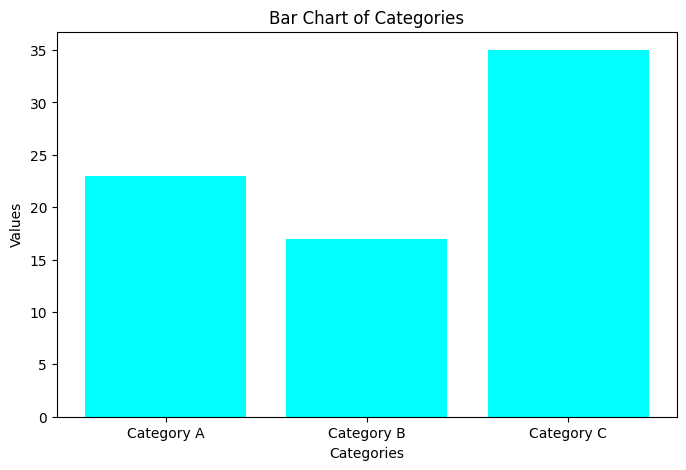

In [4]:
import matplotlib.pyplot as plt

# Data for plotting
categories = ['Category A', 'Category B', 'Category C']
values = [23, 17, 35]
# Plot
plt.figure(figsize=(8, 5))
plt.bar(categories, values, color='cyan')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart of Categories')
plt.show()

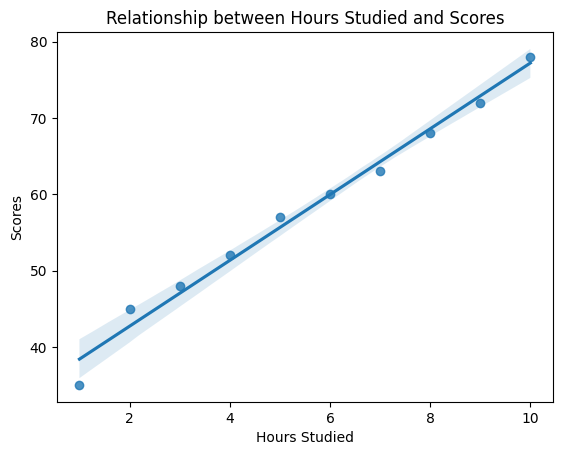

In [5]:
import seaborn as sns
import pandas as pd

# Sample data
data = {
    'Hours Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Scores': [35, 45, 48, 52, 57, 60, 63, 68, 72, 78]
}
df = pd.DataFrame(data)
# Plot regplot menggabungkan scatter plot dan garis regresi linear
sns.regplot(x='Hours Studied', y='Scores', data=df)
plt.title('Relationship between Hours Studied and Scores')
plt.show()

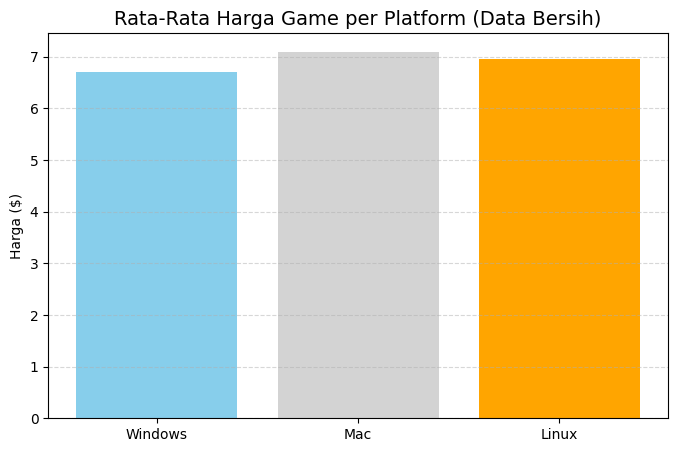

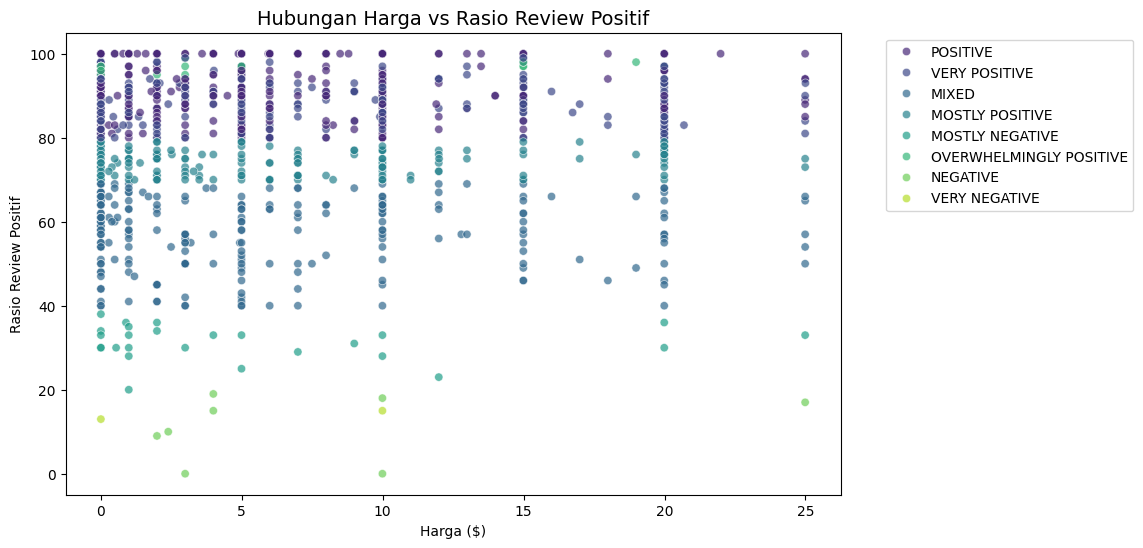

In [6]:
avg_price_win = df_games_clean[df_games_clean['win'] == True]['price_final'].mean()
avg_price_mac = df_games_clean[df_games_clean['mac'] == True]['price_final'].mean()
avg_price_linux = df_games_clean[df_games_clean['linux'] == True]['price_final'].mean()

platforms = ['Windows', 'Mac', 'Linux']
prices = [avg_price_win, avg_price_mac, avg_price_linux]
plt.figure(figsize=(8, 5))
plt.bar(platforms, prices, color=['skyblue', 'lightgrey', 'orange'])
plt.title('Rata-Rata Harga Game per Platform (Data Bersih)', fontsize=14)
plt.ylabel('Harga ($)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
# 2. Visualisasi Hubungan: Scatter Plot Harga vs Positive Ratio
# Mengambil sampel data agar plot tidak terlalu berat (karena data ribuan)
df_sample = df_games_clean.sample(1000)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_sample, 
    x='price_final', 
    y='positive_ratio', 
    hue='rating', # Memberi warna berbeda berdasarkan rating
    palette='viridis',
    alpha=0.7
)
plt.title('Hubungan Harga vs Rasio Review Positif', fontsize=14)
plt.xlabel('Harga ($)')
plt.ylabel('Rasio Review Positif')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Legenda di luar
plt.show()

/tmp/ipykernel_3729/1380295103.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df_games_clean, ax=axes[0, 1],
/tmp/ipykernel_3729/1380295103.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_final', y='rating', data=df_games_clean, ax=axes[1, 0], palette='coolwarm')


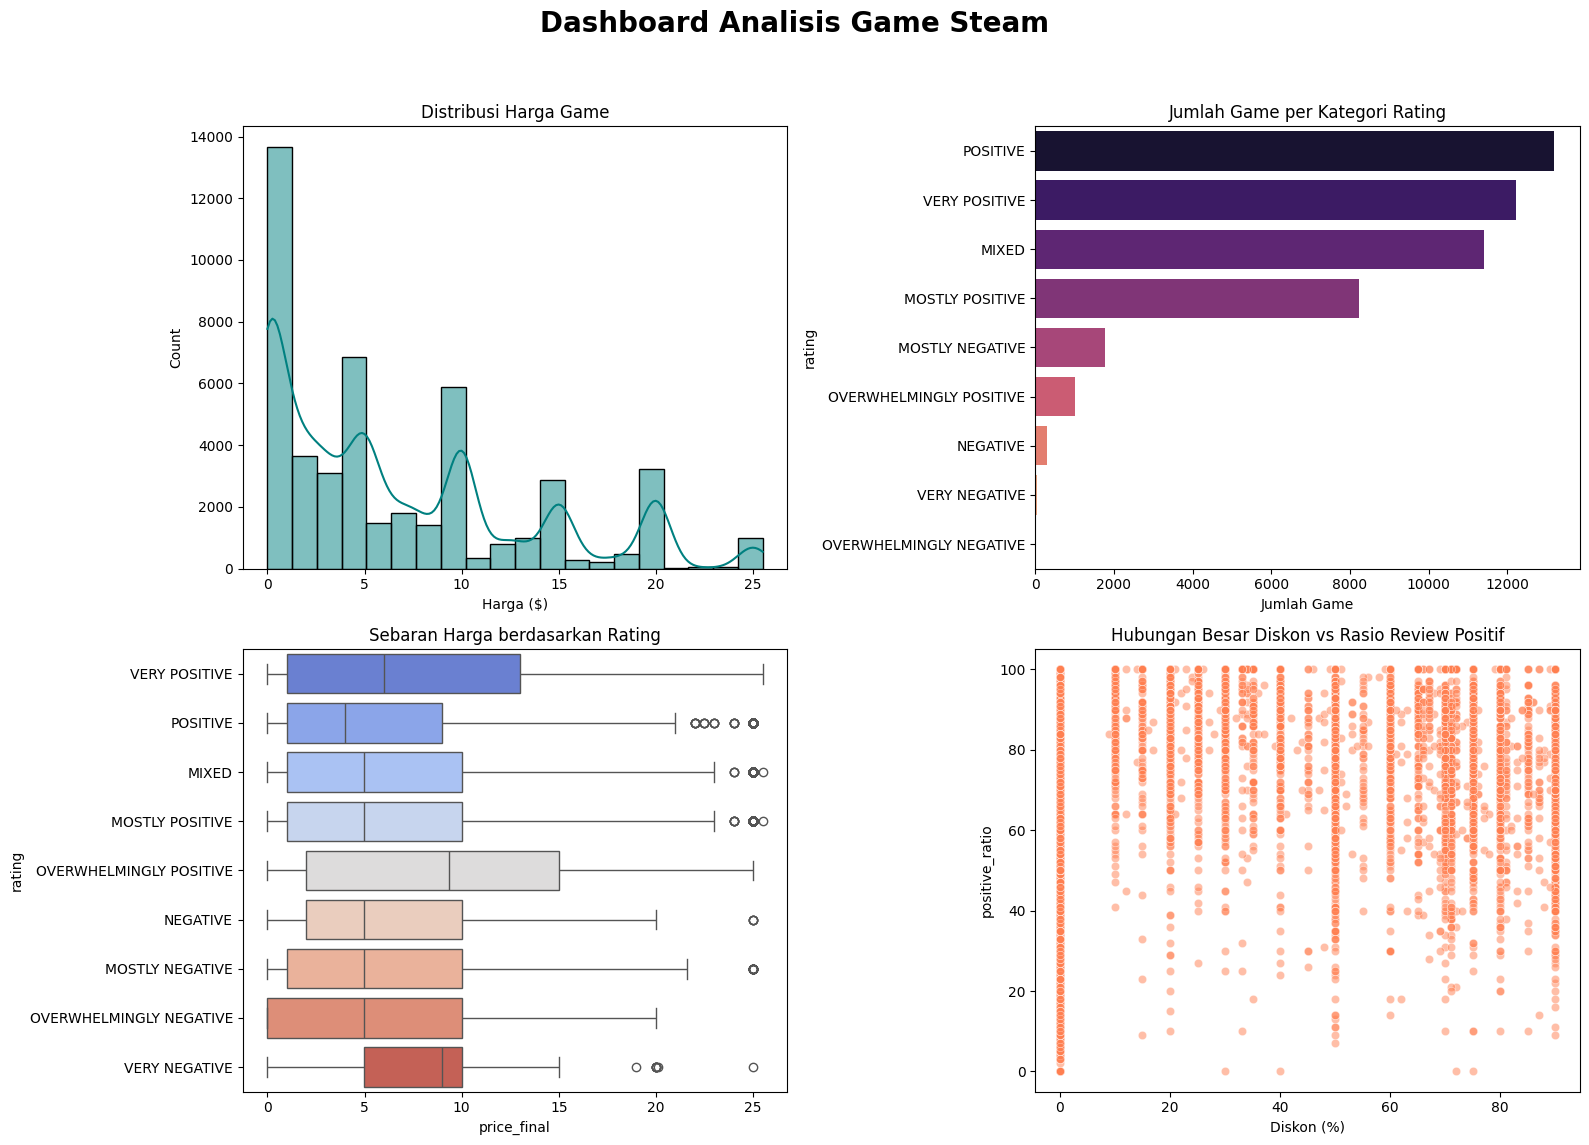

In [7]:
# Setup layout grid 2x2 (4 grafik dalam satu gambar)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Dashboard Analisis Game Steam', fontsize=20, fontweight='bold')

# Plot 1: Histogram Distribusi Harga (Seaborn)
# Menunjukkan sebaran harga game setelah outlier dibuang
sns.histplot(df_games_clean['price_final'], bins=20, kde=True, ax=axes[0, 0], color='teal')
axes[0, 0].set_title('Distribusi Harga Game')
axes[0, 0].set_xlabel('Harga ($)')
# Plot 2: Countplot Jumlah Game per Rating (Seaborn)
# Melihat rating mana yang paling umum diberikan
sns.countplot(y='rating', data=df_games_clean, ax=axes[0, 1], 
              order=df_games_clean['rating'].value_counts().index, palette='magma')
axes[0, 1].set_title('Jumlah Game per Kategori Rating')
axes[0, 1].set_xlabel('Jumlah Game')
# Plot 3: Boxplot Harga berdasarkan Rating (Seaborn)
# Analisis apakah game dengan rating "Overwhelmingly Positive" cenderung lebih mahal?
sns.boxplot(x='price_final', y='rating', data=df_games_clean, ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title('Sebaran Harga berdasarkan Rating')
# Plot 4: Scatter Plot Diskon vs Positive Ratio
# Apakah diskon besar berhubungan dengan review positif?
sns.scatterplot(x='discount', y='positive_ratio', data=df_games_clean, ax=axes[1, 1], alpha=0.5, color='coral')
axes[1, 1].set_title('Hubungan Besar Diskon vs Rasio Review Positif')
axes[1, 1].set_xlabel('Diskon (%)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Mengatur layout agar judul tidak tertutup
plt.show()